#### Generate Traditional subtraction & single condition map

For VDQ data, you ONLY need dRR matrix.   
Just input ids you want to subtract against.

In [1]:
import Common_Functions as cf
from OI_Functions.Map_Subtractor import Sub_Map_Generator
from OI_Functions.VDaQ_dRR_Generator import BLK2DRR
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd


wp = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\Run01_G8\Processed'
drr_file = cf.Load_Variable(cf.join(wp,r'dRR_Dictionaries.pkl'))
drr_file.keys()


dict_keys([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

After load in, just input the id and method.

All Condition ID Names:dict_keys([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Folder D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method already exists!


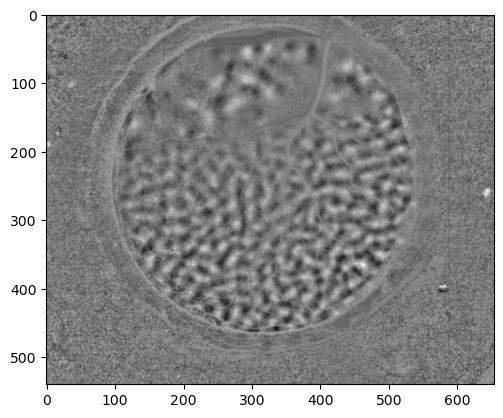

In [2]:
calculator = Sub_Map_Generator(drr_file)

ao,ao_raw_drr,ao_filted_drr,p_ao = calculator.Get_Map([2,6],[4,8],clip_value = 5,savepath = r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method',filter_flag=True,HP_sigma=20,LP_sigma=0.75,graph_name = 'A-O')

Let's compare the effect of clip and filter on given graph.

Text(0.5, 1.0, 'Clip and Filted A-O')

<Figure size 640x480 with 0 Axes>

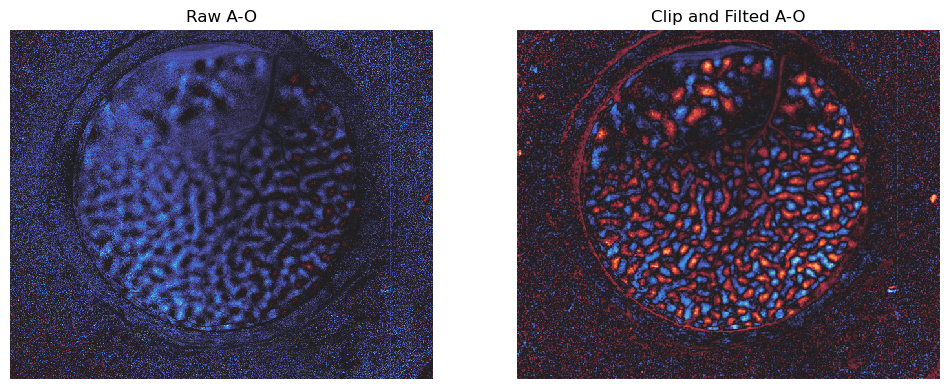

In [3]:
from scipy.ndimage import gaussian_filter
clip_std = 2.5
HP_sigma = 20
LP_sigma = 0.75

raw_graph = cf.Load_Variable(r'D:\ZR\_Data_Temp\VDaQ_Data\200910_L80_LM_OI\_V2_Sripe_Method\A-O_Raw.pkl')
c_clipped = np.clip(raw_graph,raw_graph.mean()-clip_std*raw_graph.std(),raw_graph.mean()+clip_std*raw_graph.std())
HP_graph = gaussian_filter(input = c_clipped, sigma = HP_sigma)
LP_graph = gaussian_filter(input = c_clipped, sigma = LP_sigma)
processed_graph = (LP_graph-HP_graph)

plt.clf()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
sns.heatmap(raw_graph,center = 0,square = True,ax = ax[0],xticklabels=False,yticklabels=False,cbar = False)

sns.heatmap(processed_graph,center = 0,square = True,ax = ax[1],xticklabels=False,yticklabels=False,cbar = False)
# center = 0, as filted graph to be 0.
ax[0].set_title('Raw A-O')
ax[1].set_title('Clip and Filted A-O')